# **Tidying**

Part of the data engineering process is data cleaning and tidying. What is done in those two processes, is trying to make the data more readable, and complete. This makes much easier to analyze, visualize, and train the data.


## **Data Tidying**

Making the data more organized, and readable is the result of applying data tidying. 

In this section two main pandas functions are used in data tidying those are `melt` and `pivot_table`.

Let's start by taking a look at the below dataframe, which represents the income ranges based on religion. This is part of the PEW research, which is famous in the US for conducting pollings and surveys on citizens.

When the following are satisfied:


1. Each variable forms a column
2. Each observation forms a row
3. Each type of observational unit forms a table

We can then say that our dataset is *tidy*.

First we need to import pandas to read csv datasets.

In [1]:
import pandas as pd
import numpy as np


### **PEW Research Dataset**

1. Start by Importing the dataset into a pandas dataframe.

In [2]:
import pandas as pd

# Use relative path for portability
df = pd.read_csv('./pew-raw.csv')


# Display the first few rows
df.head(15)


,religion,<$10k,$10-20k,$20-30k,$30-40k,$40-50k,$50-75k
0,Agnostic,27,34,60,81,76,137
1,Atheist,12,27,37,52,35,70
2,Buddhist,27,21,30,34,33,58
3,Catholic,418,617,732,670,638,1116
4,Dont know/refused,15,14,15,11,10,35
5,Evangelical Prot,575,869,1064,982,881,1486
6,Hindu,1,9,7,9,11,34
7,Historically Black Prot,228,244,236,238,197,223
8,Jehovahs Witness,20,27,24,24,21,30
9,Jewish,19,19,25,25,30,95


2. Observe the dataset using the `loc`, `iloc`, `head`, or `tail` approaches

In [3]:
# Display the first 5 rows using head()
print("First 5 rows using head():")
display(df.head())

# Display the last 5 rows using tail()
print("Last 5 rows using tail():")
display(df.tail())

# Access the 3rd row using iloc 
print("Row at index 2 using iloc:")
display(df.iloc[2])

# Remove leading/trailing spaces from column names
df.columns = df.columns.str.strip()

# Access specific rows and columns using loc
print("First 3 rows of selected columns using loc:")
display(df.loc[0:2, ['religion', '<$10k', '$50-75k']])


First 5 rows using head():


,religion,<$10k,$10-20k,$20-30k,$30-40k,$40-50k,$50-75k
0,Agnostic,27,34,60,81,76,137
1,Atheist,12,27,37,52,35,70
2,Buddhist,27,21,30,34,33,58
3,Catholic,418,617,732,670,638,1116
4,Dont know/refused,15,14,15,11,10,35


Last 5 rows using tail():


,religion,<$10k,$10-20k,$20-30k,$30-40k,$40-50k,$50-75k
5,Evangelical Prot,575,869,1064,982,881,1486
6,Hindu,1,9,7,9,11,34
7,Historically Black Prot,228,244,236,238,197,223
8,Jehovahs Witness,20,27,24,24,21,30
9,Jewish,19,19,25,25,30,95


Row at index 2 using iloc:


religion    Buddhist
 <$10k            27
 $10-20k          21
$20-30k           30
$30-40k           34
 $40-50k          33
$50-75k           58
Name: 2, dtype: object

First 3 rows of selected columns using loc:


,religion,<$10k,$50-75k
0,Agnostic,27,137
1,Atheist,12,70
2,Buddhist,27,58


***What does not seem right in the above dataframe?***

Because income ranges—which are essentially data values—are used as column headers, the original dataframe is not neat.  Analysis is challenging because of this structure.  Every variable should have its own column in a neat fashion.  By transforming income ranges into values under a single 'income' column, melt() fixes this.

3. Try to make the column headers represent a variable not a value. For that, use the `melt` function.

In [4]:
# Melt the dataframe to make it tidy
df_tidy = df.melt(id_vars='religion', var_name='income', value_name='count')

# Display the tidy version
print("Tidy DataFrame:")
display(df_tidy.head())


Tidy DataFrame:


,religion,income,count
0,Agnostic,<$10k,27
1,Atheist,<$10k,12
2,Buddhist,<$10k,27
3,Catholic,<$10k,418
4,Dont know/refused,<$10k,15


### **Billboard Dataset**

This dataset outlines data about the top hit songs on the Billboard list and the week from entrance that it was in the billboard with the ranking.

1. Read the dataset and store it in a pandas dataframe. Note that the usual utf-8 encoding does not work on this dataset. The reason behind this is that there might be characters that are not supported by `utf-8`.

The suggestion is to use for this dataset `unicode_escape` encoding. (converts all non-ASCII characters into their \uXXXX representations)

In [5]:
import pandas as pd

# Load the dataset using unicode_escape encoding
df = pd.read_csv('billboard.csv', encoding='unicode_escape')

# Display the first few rows
df.head(20)


,year,artist.inverted,track,time,genre,date.entered,date.peaked,x1st.week,x2nd.week,x3rd.week,...,x67th.week,x68th.week,x69th.week,x70th.week,x71st.week,x72nd.week,x73rd.week,x74th.week,x75th.week,x76th.week
0,2000,Destiny's Child,Independent Women Part I,3:38,Rock,2000-09-23,2000-11-18,78,63.0,49.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2000,Santana,"Maria, Maria",4:18,Rock,2000-02-12,2000-04-08,15,8.0,6.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2000,Savage Garden,I Knew I Loved You,4:07,Rock,1999-10-23,2000-01-29,71,48.0,43.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2000,Madonna,Music,3:45,Rock,2000-08-12,2000-09-16,41,23.0,18.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2000,"Aguilera, Christina",Come On Over Baby (All I Want Is You),3:38,Rock,2000-08-05,2000-10-14,57,47.0,45.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,2000,Janet,Doesn't Really Matter,4:17,Rock,2000-06-17,2000-08-26,59,52.0,43.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,2000,Destiny's Child,Say My Name,4:31,Rock,1999-12-25,2000-03-18,83,83.0,44.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,2000,"Iglesias, Enrique",Be With You,3:36,Latin,2000-04-01,2000-06-24,63,45.0,34.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,2000,Sisqo,Incomplete,3:52,Rock,2000-06-24,2000-08-12,77,66.0,61.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,2000,Lonestar,Amazed,4:25,Country,1999-06-05,2000-03-04,81,54.0,44.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


2. Observe the first few rows of the dataset.

In [6]:
# Display the first 5 rows
df.head()


,year,artist.inverted,track,time,genre,date.entered,date.peaked,x1st.week,x2nd.week,x3rd.week,...,x67th.week,x68th.week,x69th.week,x70th.week,x71st.week,x72nd.week,x73rd.week,x74th.week,x75th.week,x76th.week
0,2000,Destiny's Child,Independent Women Part I,3:38,Rock,2000-09-23,2000-11-18,78,63.0,49.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2000,Santana,"Maria, Maria",4:18,Rock,2000-02-12,2000-04-08,15,8.0,6.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2000,Savage Garden,I Knew I Loved You,4:07,Rock,1999-10-23,2000-01-29,71,48.0,43.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2000,Madonna,Music,3:45,Rock,2000-08-12,2000-09-16,41,23.0,18.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2000,"Aguilera, Christina",Come On Over Baby (All I Want Is You),3:38,Rock,2000-08-05,2000-10-14,57,47.0,45.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


***What is wrong with the above dataset?***

The dataset is not tidy. Each song's information is spread across multiple week columns (e.g., `x1st.week`, `x2nd.week`, etc.), which represent values of a variable (week number) rather than proper column headers. Additionally, these repeated columns violate the tidy data principle that each variable should have its own column and each observation should form a single row. This structure makes it difficult to analyze trends over time.


3. Let's, again, use the `melt` function to fix the general structure of the dataframe.

In [7]:
# Melt the dataframe: keep song-level columns, melt week columns
df_tidy = df.melt(
    id_vars=['year', 'artist.inverted', 'track', 'time', 'genre'], 
    var_name='week',
    value_name='rank'
)

# Display the first few rows of the tidy DataFrame
df_tidy.head()


,year,artist.inverted,track,time,genre,week,rank
0,2000,Destiny's Child,Independent Women Part I,3:38,Rock,date.entered,2000-09-23
1,2000,Santana,"Maria, Maria",4:18,Rock,date.entered,2000-02-12
2,2000,Savage Garden,I Knew I Loved You,4:07,Rock,date.entered,1999-10-23
3,2000,Madonna,Music,3:45,Rock,date.entered,2000-08-12
4,2000,"Aguilera, Christina",Come On Over Baby (All I Want Is You),3:38,Rock,date.entered,2000-08-05


If we inspect the current dataframe. We find that it is structured in a better way than before. 

However, the ***Week*** column looks a bit ugly!

4. Let's try to place only the week number in that column without the extras surronding it.

After melting the dataset, the `week` column still contains messy strings like `"x1st.week"`, `"x2nd.week"`, etc. These are not ideal for analysis or visualization.

To clean this, we extract only the numeric part (i.e., the actual week number) and convert it into an integer format. This makes the column easier to sort, filter, and interpret in future steps.


In [8]:
# Clean the week column by extracting only the digits
df_tidy['week'] = df_tidy['week'].str.extract(r'(\d+)').astype('Int64')

# Display cleaned result
df_tidy.head()


,year,artist.inverted,track,time,genre,week,rank
0,2000,Destiny's Child,Independent Women Part I,3:38,Rock,<NA>,2000-09-23
1,2000,Santana,"Maria, Maria",4:18,Rock,<NA>,2000-02-12
2,2000,Savage Garden,I Knew I Loved You,4:07,Rock,<NA>,1999-10-23
3,2000,Madonna,Music,3:45,Rock,<NA>,2000-08-12
4,2000,"Aguilera, Christina",Come On Over Baby (All I Want Is You),3:38,Rock,<NA>,2000-08-05


5. Now let's inspect the ***Week*** column in the dataframe.

In [9]:
import pandas as pd

# Convert unique week values to DataFrame
unique_weeks = sorted(df_tidy['week'].dropna().unique())
unique_weeks_df = pd.DataFrame({'Week Number': unique_weeks})

# Summary statistics
week_stats = df_tidy['week'].describe()
week_stats_df = pd.DataFrame({
    'Statistic': week_stats.index,
    'Value': week_stats.values
})

# Display both as tables
print(" Unique Week Values Table:")
display(unique_weeks_df)

print("\n Week Summary Statistics Table:")
display(week_stats_df)


 Unique Week Values Table:


,Week Number
0,1
1,2
2,3
3,4
4,5
...,...
71,72
72,73
73,74
74,75



 Week Summary Statistics Table:


,Statistic,Value
0,count,24092.0
1,mean,38.5
2,std,21.937866
3,min,1.0
4,25%,19.75
5,50%,38.5
6,75%,57.25
7,max,76.0


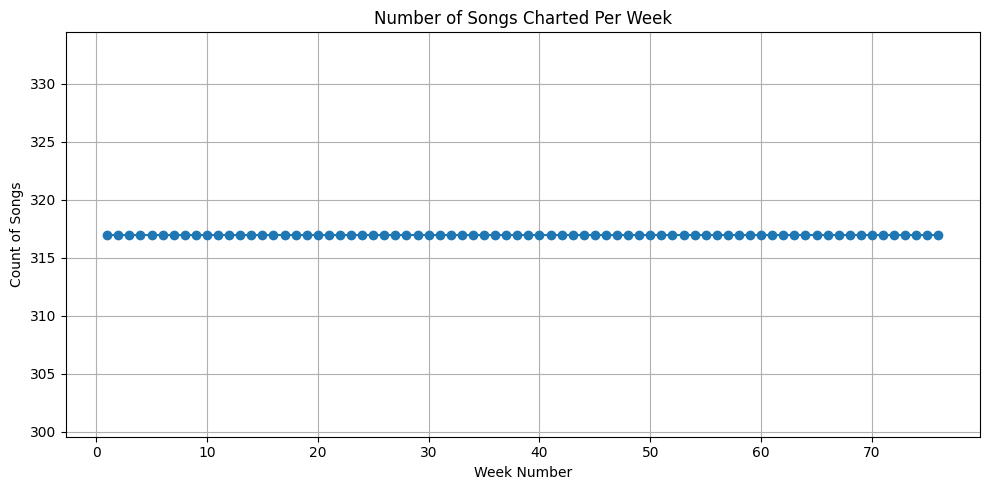

In [10]:
import matplotlib.pyplot as plt

# Count number of entries per week
week_counts = df_tidy['week'].value_counts().sort_index()

# Line plot of week counts
plt.figure(figsize=(10, 5))
plt.plot(week_counts.index, week_counts.values, marker='o', linestyle='-')
plt.title('Number of Songs Charted Per Week')
plt.xlabel('Week Number')
plt.ylabel('Count of Songs')
plt.grid(True)
plt.tight_layout()
plt.show()


Next, let's try to find the date at which the song ranked the number that is shown per row.

6. To do that let's first think of the equation that is going to get us the relevant date at which the song ranked the *rth*.



In [11]:
# Convert 'year' to datetime representing January 1st of that year
df_tidy['start_date'] = pd.to_datetime(df_tidy['year'].astype(str) + '-01-01')

# Add (week - 1) * 7 days to get the actual chart date
df_tidy['chart_date'] = df_tidy['start_date'] + pd.to_timedelta((df_tidy['week'] - 1) * 7, unit='D')

# Preview the result
df_tidy[['track', 'artist.inverted', 'week', 'rank', 'chart_date']].head()


,track,artist.inverted,week,rank,chart_date
0,Independent Women Part I,Destiny's Child,<NA>,2000-09-23,NaT
1,"Maria, Maria",Santana,<NA>,2000-02-12,NaT
2,I Knew I Loved You,Savage Garden,<NA>,1999-10-23,NaT
3,Music,Madonna,<NA>,2000-08-12,NaT
4,Come On Over Baby (All I Want Is You),"Aguilera, Christina",<NA>,2000-08-05,NaT


*Timedeltas are absolute differences in times, expressed in difference units (e.g. days, hours, minutes, seconds). This method converts an argument from a recognized timedelta format / value into a Timedelta type.*


***What is the problem with the calculation above?***

### Problem with the Chart Date Calculation

The main issue is that the calculation assumes every song started charting exactly on **January 1st** of its release year. This is often incorrect because songs typically enter the Billboard charts at different points during the year. As a result, the calculated `chart_date` may not reflect the true date when the song achieved a particular rank — it only approximates based on a fixed weekly offset from January 1st.


7. Let's only keep necessary columns

In [14]:
# Keep only the relevant columns using the current column names
df_tidy = df_tidy[['track', 'artist.inverted', 'week', 'rank', 'chart_date']]

# Display cleaned dataframe
df_tidy.head()


,track,artist.inverted,week,rank,chart_date
0,Independent Women Part I,Destiny's Child,<NA>,2000-09-23,NaT
1,"Maria, Maria",Santana,<NA>,2000-02-12,NaT
2,I Knew I Loved You,Savage Garden,<NA>,1999-10-23,NaT
3,Music,Madonna,<NA>,2000-08-12,NaT
4,Come On Over Baby (All I Want Is You),"Aguilera, Christina",<NA>,2000-08-05,NaT


8. How to rename your columns?

In [17]:
df_tidy = df_tidy.rename(columns={
    'track': 'song_title',
    'artist.inverted': 'artist_name',
    'week': 'week_number',
    'rank': 'ranks',
    'chart_date': 'date'
})

print(df_tidy.columns)
df_tidy.head()


Index(['song_title', 'artist_name', 'week_number', 'chart_rank',
       'ranking_date'],
      dtype='object')


,song_title,artist_name,week_number,chart_rank,ranking_date
0,Independent Women Part I,Destiny's Child,<NA>,2000-09-23,NaT
1,"Maria, Maria",Santana,<NA>,2000-02-12,NaT
2,I Knew I Loved You,Savage Garden,<NA>,1999-10-23,NaT
3,Music,Madonna,<NA>,2000-08-12,NaT
4,Come On Over Baby (All I Want Is You),"Aguilera, Christina",<NA>,2000-08-05,NaT


Display the dataframe

In the above dataframe, there are some *NaN* values. What are we going to do? <br/>
9. Apply quick data cleaning and then observe the dataset

In [18]:
# Remove rows with any NaN values
df_tidy.dropna(inplace=True)

# Reset index after dropping rows
df_tidy.reset_index(drop=True, inplace=True)

# Display the cleaned DataFrame
df_tidy.head()


,song_title,artist_name,week_number,chart_rank,ranking_date
0,Independent Women Part I,Destiny's Child,1,78,2000-01-01
1,"Maria, Maria",Santana,1,15,2000-01-01
2,I Knew I Loved You,Savage Garden,1,71,2000-01-01
3,Music,Madonna,1,41,2000-01-01
4,Come On Over Baby (All I Want Is You),"Aguilera, Christina",1,57,2000-01-01


## **Data Cleaning**

Data cleaning involves removing unwanted characters, imputing, or dropping missing values.

The decision is based on the dataset you have, and the information you can extract from the other columns.


Examples of data cleaning include cleaning:

1.   **Missing Data**
2.   **Irregular Data** (Outliers)
3.   **Unnecessary Data** — Repetitive Data, Duplicates and more
4.   **Inconsistent Data** — Capitalization, Addresses and more








### **Cars Data Set**

Start by reading the dataset related to car models: ./CSVs/cars.csv

In [ ]:
import pandas as pd

# Read the CSV with semicolon separator and skip the second row
df = pd.read_csv('./cars.csv', sep=';', skiprows=[1])

# Display the first few rows
print("Preview of cleaned data:")
display(df.head())


First Row seems to be the datatype, we need to remove it

Let's observe the columns with null values.  Either by using the `isnull().sum()` function 

There aren't many missing values. Let's take a glimpse at the percentage of the missing values:

**HINT:** We'll need `Numpy` for the below task.

Around *0.19%* of the values are missing, which isn't a lot. Therefore, we might go with the option of dropping all the rows with null values.

Lets also check dropping the columns

In [ ]:
df_dropped = df.drop(columns=['Model', 'Origin'])

# Drop multiple columns

# Display result
print("Data after dropping column(s):")
display(df_dropped.head())


Let's observe how many columns we lost

In [ ]:
# Number of columns before dropping
original_cols = df.shape[1]

# Drop specific columns (example: dropping 'Model' and 'Origin')
df_dropped = df.drop(columns=['Model', 'Origin'])

# Number of columns after dropping
new_cols = df_dropped.shape[1]

# Print results
print(f"Original number of columns: {original_cols}")
print(f"New number of columns: {new_cols}")
print(f"Number of columns dropped: {original_cols - new_cols}")


### **Cars Dataset - Filling in missing values automatically**

Another option is to try and fill in the missing values through imputations.

Let's take the `MPG` column for example. We can fill in the missing values with 0s through the following line of code:

`df_cars.fillna(0) `. 

However, this does not make much sense as there isn't MPG equal to 0. How about we plot the MPG column and if it follows a random distribution we can use the mean of the column to compute the missing values. Otherwise, we can use the median (if there is a skewed normal distribution). However, there might be a better way of imputation which is getting the median or the mean of the MPG of the cars with similar attributes.

If we observe the graph above, we can consider it in a way or another normally distributed. Therefore, we can impute the missing values using the mean.

To compute the mean we need numeric values. However the values in the dataframe are objects. Therefore, we need to change them to numerics so that we can compute them.

Now let's see what is the mean of the MPG column

We can use this mean to compute the missing values since the graph demonstarted a normal distribution

### **Car Dataset - Simple Imputer**

*SimpleImputer* is a `scikit-learn` class which is helpful in handling the missing data in the predictive model dataset. It replaces the `NaN` values with a specified placeholder.
It is implemented by the use of the `SimpleImputer()` method which takes the following arguments :

`missing_values` : The missing_values placeholder which has to be imputed. By default is NaN

`strategy` : The data which will replace the NaN values from the dataset. The strategy argument can take the values – ‘mean'(default), ‘median’, ‘most_frequent’ and ‘constant’.


Let's start by importing the `SimpleImputer` into our notebook

What we need to do are two essential steps:

1. fit the data (compute the mean / median / most freq)
2. transform the data (place the computed values in the NaN cells)

In [ ]:
from sklearn.impute import SimpleImputer

# Select only numeric columns for imputation
numeric_df = df.select_dtypes(include=['float64', 'int64'])

# Initialize the imputer with 'median' strategy
imputer = SimpleImputer(strategy='median')

# Fit and transform in one step
imputed_array = imputer.fit_transform(numeric_df)

# Put imputed values back into the original dataframe
df[numeric_df.columns] = imputed_array

# Show result
print("Missing values filled using median imputation:")
display(df.head())


## **Outlier Detection** 


An Outlier is a data-item/object that deviates significantly from the rest of the (so-called normal)objects. They can be caused by measurement or execution errors. The analysis for outlier detection is referred to as outlier mining. There are many ways to detect the outliers, and the removal process is the data frame same as removing a data item from the panda’s data frame.



https://www.geeksforgeeks.org/detect-and-remove-the-outliers-using-python/





In [ ]:
# Select a numeric column to check for outliers, e.g., 'MPG'
col = 'MPG'

# Calculate Q1 and Q3
Q1 = df[col].quantile(0.25)
Q3 = df[col].quantile(0.75)
IQR = Q3 - Q1

# Define bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter out outliers
df_no_outliers = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]

print(f"Original rows: {df.shape[0]}")
print(f"Rows after removing outliers in '{col}': {df_no_outliers.shape[0]}")


### Outliers Visualization

#### Visualizing Outliers Using Box Plot
It captures the summary of the data effectively and efficiently with only a simple box and whiskers. Boxplot summarizes sample data using 25th, 50th, and 75th percentiles. One can just get insights(quartiles, median, and outliers) into the dataset by just looking at its boxplot.

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Column to analyze for outliers
col = 'MPG'  # You can change to 'Horsepower', 'Weight', etc.

# --- Outliers Visualization Using Box Plot ---
print(f"Boxplot for '{col}' (to visualize outliers):")
plt.figure(figsize=(8, 4))
sns.boxplot(data=df, x=col)
plt.title(f"Boxplot for {col}")
plt.xlabel(col)
plt.show()

# --- Detecting and Removing Outliers using IQR Method ---
Q1 = df[col].quantile(0.25)
Q3 = df[col].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Remove outliers
df_no_outliers = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]

# --- Summary of effect ---
print(f"Original number of rows: {df.shape[0]}")
print(f"Rows after removing outliers in '{col}': {df_no_outliers.shape[0]}")


#### Visualizing Outliers Using ScatterPlot.

It is used when you have paired numerical data and when your dependent variable has multiple values for each reading independent variable, or when trying to determine the relationship between the two variables. In the process of utilizing the scatter plot, one can also use it for outlier detection.

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Choose two numeric columns for scatterplot
x_col = 'Horsepower'  # Independent variable
y_col = 'MPG'         # Dependent variable

# Scatter Plot for Outlier Detection
print(f"Scatter Plot of {x_col} vs {y_col} :")
plt.figure(figsize=(8, 5))
sns.scatterplot(data=df, x=x_col, y=y_col)
plt.title(f"Scatter Plot: {x_col} vs {y_col}")
plt.xlabel(x_col)
plt.ylabel(y_col)
plt.grid(True)
plt.show()


#### Z-Score:
Z- Score is also called a standard score. This value/score helps to understand that how far is the data point from the mean. And after setting up a threshold value one can utilize z score values of data points to define the outliers.
<br>
Zscore = (data_point -mean) / std. deviation



In [ ]:
import numpy as np
import pandas as pd
from scipy.stats import zscore

# Choose a numeric column for Z-Score analysis
col = 'MPG' 

# Calculate Z-scores
df['z_score'] = zscore(df[col])

# Define threshold for Z-score (commonly 3 or -3)
threshold = 3

# Identify and remove outliers
df_z_removed = df[(df['z_score'] < threshold) & (df['z_score'] > -threshold)].copy()

# Drop z_score column (cleanup)
df_z_removed.drop(columns='z_score', inplace=True)

# Summary
print(f"Original number of rows: {df.shape[0]}")
print(f"Number of rows after removing Z-score outliers in '{col}': {df_z_removed.shape[0]}")


Now to define an outlier threshold value is chosen which is generally 3.0. As 99.7% of the data points lie between +/- 3 standard deviation (using Gaussian Distribution approach).

Rows where Z value is greater than 2

In [ ]:
import numpy as np
from scipy.stats import zscore

# Column to check for Z-score based outliers
col = 'MPG' 

# Calculate Z-scores
df['z_score'] = zscore(df[col])

# Filter rows where absolute Z-score > 2
outliers_df = df[np.abs(df['z_score']) > 2]

# Display results
print(f"Rows where absolute Z-score of '{col}' > 2 (Potential Outliers): {outliers_df.shape[0]}")
display(outliers_df[[col, 'z_score']])


#### IQR (Inter-Quartile Range)
Inter Quartile Range approach to finding the outliers is the most commonly used and most trusted approach used in the research field. <Br>
IQR = Quartile3 - Quartile1

In [ ]:
# Choose the column for IQR analysis
col = 'MPG'  

# IQR Calculation 
Q1 = df[col].quantile(0.25)
Q3 = df[col].quantile(0.75)
IQR = Q3 - Q1

# Outlier bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter data to exclude outliers
df_iqr_cleaned = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]

# Summary
print(f"IQR for '{col}': {IQR:.2f}")
print(f"Lower bound: {lower_bound:.2f}, Upper bound: {upper_bound:.2f}")
print(f"Original rows: {df.shape[0]}")
print(f"Rows after IQR-based outlier removal: {df_iqr_cleaned.shape[0]}")


To define the outlier base value is defined above and below dataset’s normal range namely Upper and Lower bounds, define the upper and the lower bound (1.5*IQR value is considered) :<br>
upper = Q3 + 1.5 * IQR <br>
lower = Q1 - 1.5 * IQR <br> 

In [ ]:
# Choose the numeric column
col = 'MPG' 

# Calculate Q1, Q3, and IQR
Q1 = df[col].quantile(0.25)
Q3 = df[col].quantile(0.75)
IQR = Q3 - Q1

# Define bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Display results
print(f"IQR for '{col}': {IQR:.2f}")
print(f"Lower Bound (Q1 - 1.5 * IQR): {lower_bound:.2f}")
print(f"Upper Bound (Q3 + 1.5 * IQR): {upper_bound:.2f}")


- Removing the outliers:
For removing the outlier, one must follow the same process of removing an entry from the dataset using its exact position in the dataset because in all the above methods of detecting the outliers end result is the list of all those data items that satisfy the outlier definition according to the method used.

In [ ]:
# Column to clean
col = 'MPG'  # Change as needed

# Calculate Q1, Q3, and IQR
Q1 = df[col].quantile(0.25)
Q3 = df[col].quantile(0.75)
IQR = Q3 - Q1

# Define bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter out the outliers (keep only rows within bounds)
df_cleaned = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]

# Summary
print(f"Original rows: {df.shape[0]}")
print(f"Rows after removing outliers from '{col}': {df_cleaned.shape[0]}")
